In [6]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_circles

(500, 1)


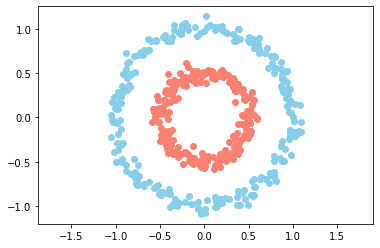

In [62]:

n = 500
p = 2
X, Y = make_circles(n_samples = n, factor = 0.5, noise = 0.05)
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:, 0] == 0, 0], 
            X[Y[:, 0] == 0, 1], 
            c = "skyblue") #  cloud points for circle minor
plt.scatter(X[Y[:, 0] == 1, 0], 
            X[Y[:, 0 ] == 1, 1],
            c = "salmon") # cloud points for circle major
plt.axis("equal")
plt.show()

In [89]:
# CLASE DE LA CAPA DE LA RED
class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f # init in the function of activation
    self.b = np.random.rand(1, n_neur) * 2 - 1 # parameters b (individuals)
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1 # parameters w (pendient)

Text(0, 0.5, 'derivad in sigma')

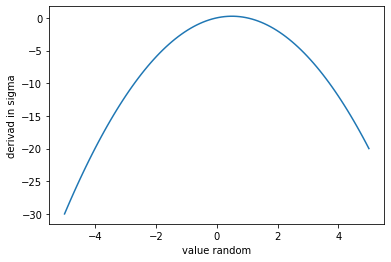

In [90]:
# FUNCIONES DE ACTIVACION
sigm = (lambda x: 1 / (1 + np.e ** (-x)), # function of activation sigma
        lambda x: x * (1 - x)) # function of activation sigma (derivad)

_x = np.linspace(-5, 5, 100) # vector random [-5, 5] in 100 number
plt.plot(_x, sigm[1](_x))
plt.xlabel("value random")
plt.ylabel("derivad in sigma")

In [137]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#....



def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]): # iteration in  topology. not incluid the final termin
    nn.append(neural_layer(topology[l], topology[l + 1], act_f))
  return nn
topology = [p , 4, 8, 1] # Structure of the red
neural_net = create_nn(topology, sigm)
neural_net

In [138]:
# training the network neural
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), # function of price
           lambda Yp, Yr: (Yp - Yr)) # derivad of the function of price

def train(neural_net, X, Y, l2_cost, lr = 0.5, train = True):

  out = [(None, X)]

  # FORWARD PASS
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y)) # salida de la funcion de la coste

# BACKPROPAGATION
  if train:

    #BACKWARD PASS

    deltas = []  

    for l in reversed(range(0, len(neural_net))): # bucle que va desde 0 hasta el numero de capas de la red

      z = out[l + 1][0]
      a = out[l + 1][1]
      print(a.shape)

      if  l == len(neural_net) - 1:
        # calculation delta desde la ultima cap

        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a)) # calculo de delta 0

      else:

        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a)) # calculo de delta de la capa posterior

      _W = neural_net[l].W

    #GRADIENT DESCENDT
    
    neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims = True) * lr
    neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

train(neural_net, X, Y, l2_cost, 0.5)
print("")                                                 


0.38769977623552754
(500, 1)
(500, 8)
(500, 4)



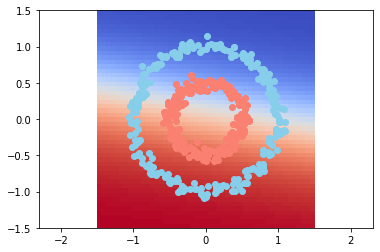

In [ ]:
import time 
from IPython.display import clear_output

neural_n = create_nn(topology, sigm) # red neuronal

loss = [] # vector lista donde se vayan guardando los costes

for i in range(2500):

  #entrenamos a la red
  pY = train(neural_n, X, Y, l2_cost, lr = 0.06)

  if i % 25 == 0:

    print(pY)

    loss.append(l2_cost[0](pY, Y))

    res = 50  # maya de 50 x 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train = False)[0][0]
    
    # visualizacion 
    plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c = "skyblue")
    plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c = "salmon")

    #borrar y dibujar
    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)